In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

# Считывание CSV-файла в объект DataFrame

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv("C:/data/credit_train.csv", encoding='cp1251', sep=';')

In [3]:
# смотрим форму датафрейма
data.shape

(170746, 15)

In [4]:
# выводим первые 5 наблюдений датафрейма
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [5]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [6]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [7]:
# смотрим количество уникальных значений
# переменной living_region
data['living_region'].nunique()

301

In [8]:
# увеличиваем максимальное количество
# отображаемых строк
pd.options.display.max_rows = 310

In [9]:
# уникальные значения переменной living_region 
# записываем в отдельный объект regions
regions = data['living_region'].unique()

In [10]:
# создаем серию, у которой в качестве значений и индексных
# меток будут выступать уникальные значения переменной
# living_region, записанные в regions
regions = pd.Series(data=regions, index=regions, name='regions')
regions

КРАСНОДАРСКИЙ КРАЙ                                                КРАСНОДАРСКИЙ КРАЙ
МОСКВА                                                                        МОСКВА
ОБЛ САРАТОВСКАЯ                                                      ОБЛ САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ОБЛ ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                              ЧЕЛЯБИНСКАЯ ОБЛАСТЬ
СТАВРОПОЛЬСКИЙ КРАЙ                                              СТАВРОПОЛЬСКИЙ КРАЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  ОБЛ НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ ОБЛ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                              КРАЙ СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                      САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                               

In [11]:
# задаем список стоп-слов
stopwrds = set(['ОБЛ','ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА', 
                'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [12]:
# пишем функцию для предобработки значений серии
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x))
    wrds = x.split(' ')
    wrds_new = []
    for w in wrds:
        if not w in stopwrds:
            wrds_new.append(w)
    x = ''.join(wrds_new)
    return x

# применяем функцию к нашей серии
regions = regions.map(clean_region)

In [13]:
# смотрим результаты применения функции
regions

КРАСНОДАРСКИЙ КРАЙ                                                 КРАСНОДАРСКИЙ
МОСКВА                                                                    МОСКВА
ОБЛ САРАТОВСКАЯ                                                      САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                                  ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                               СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙАВТОНОМНЫЙОКРУГ-ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                               СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                  САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                                  БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ           

In [14]:
# вносим финальные корректировки в regions
regions['ЧУКОТСКИЙ АO'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] ='САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [15]:
# вновь смотрим серию
regions

КРАСНОДАРСКИЙ КРАЙ                                  КРАСНОДАРСКИЙ
МОСКВА                                                     МОСКВА
ОБЛ САРАТОВСКАЯ                                       САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                   ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                   ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                   НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                         МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         ХАНТЫ-МАНСИЙСКИЙ
КРАЙ СТАВРОПОЛЬСКИЙ                                СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                   САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                   БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ                                   АРХАНГЕЛЬСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АО                              ХАНТЫ-МАНСИЙСКИЙ
РЕСП БАШКОРТОСТАН                                    БАШКОРТОСТАН
ПЕРМСКИЙ К

In [16]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [17]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

In [18]:
# смотрим количество уникальных значений
# по переменной living_region
data['living_region'].nunique()

85

# Преобразование типов переменных

In [19]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null object
credit_month            170746 non-null int64
tariff_id               170746 non-null float64
score_shk               170739 non-null object
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 18.2+ MB
None


In [20]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию.

In [21]:
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [22]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null object
score_shk               170739 non-null float64
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 18.2+ MB
None


In [23]:
# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Переименование категорий переменных

In [24]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
d = {'M':'Male', 'F':'Female'}

# передаем словарь в метод map
data['gender'] = data['gender'].map(d)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,Female,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,Female,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,Male,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


In [25]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
f = {'Male':'M', 'Female':'F'}

# передаем в метод replace словарь, в котором ключем
# будет название переменной, а значением - словарь со
# старыми и новыми названиями категорий
data = data.replace({'gender': f})
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Обработка редких категорий

In [26]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
Name: education, dtype:

In [27]:
# выводим частоты категорий для переменной job_position,
# dropna=False выведет частоту пропусков, если они есть 
print(data['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


In [28]:
# записываем указанные категории переменной
# job_position в отдельную категорию OTHER
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

In [29]:
# выводим частоты категорий для переменной job_position
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [30]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64


In [31]:
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = '1.99'

In [32]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.1     69355
1.6     39117
1.32    15537
1.4     10970
1.5      7497
1.9      5538
1.43     3930
1.3      3339
1.16     3232
1.0      2245
1.44     2228
1.19     2102
1.2      1306
1.7      1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.99       79
1.25       56
Name: tariff_id, dtype: int64


In [33]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

ЕВРЕЙСКАЯ      203
nan            192
НЕНЕЦКИЙ       172
МАГАДАНСКАЯ    159
ДАГЕСТАН        69
АЛТАЙ           54
ЧУКОТСКИЙ       32
ЧЕЧЕНСКАЯ       31
ИНГУШЕТИЯ       19
ЧИТИНСКАЯ       17
Name: living_region, dtype: int64


In [34]:
# создаем серию, у которой значениями будут частоты 
# категорий переменной living_region
series = data['living_region'].value_counts()

In [35]:
# создаем булеву маску, если частота категории меньше 0.029,
# будет возвращено значение TRUE, в противном случае
# будет возвращено значение FALSE
mask = (series/series.sum() * 100).lt(0.029)

# выводим последние 10 категорий
mask.tail(10)

ЕВРЕЙСКАЯ      False
nan            False
НЕНЕЦКИЙ       False
МАГАДАНСКАЯ    False
ДАГЕСТАН       False
АЛТАЙ          False
ЧУКОТСКИЙ       True
ЧЕЧЕНСКАЯ       True
ИНГУШЕТИЯ       True
ЧИТИНСКАЯ       True
Name: living_region, dtype: bool

In [36]:
# с помощью функции np.where мы все категории, по которым возвращено 
# значение TRUE, заменим на категорию OTHER, в противном случае 
# оставим категории неизменными
data['living_region'] = np.where(data['living_region'].isin(series[mask].index), 
                                 'OTHER', data['living_region'])

In [37]:
# выводим частоты для последних 10 категорий 
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

КАМЧАТСКИЙ               412
СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ    379
КАЛМЫКИЯ                 305
ЕВРЕЙСКАЯ                203
nan                      192
НЕНЕЦКИЙ                 172
МАГАДАНСКАЯ              159
OTHER                     99
ДАГЕСТАН                  69
АЛТАЙ                     54
Name: living_region, dtype: int64


# Разбиение набора данных на обучающую и контрольную

In [38]:
# с помощью метода .sample() из исходного 
# датафрейма data случайно отбираем 
# 70% наблюдений в обучающий датафрейм train
train=data.sample(frac=0.7, random_state=200)

# в исходном датафрейме data оставляем только те 
# наблюдения, индексные метки которых отличаются 
# от индекса наблюдений, попавших в обучающий датафрейм 
# train, и записываем контрольный датафрейм test
test=data.drop(train.index)

In [39]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

gender                     0
age                        1
marital_status             1
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  4
education                  2
living_region              0
monthly_income             2
credit_count            6477
overdue_credit_count    6477
open_account_flg           0
dtype: int64

In [40]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

gender                     0
age                        2
marital_status             2
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  3
education                  3
living_region              0
monthly_income             3
credit_count            2753
overdue_credit_count    2753
open_account_flg           0
dtype: int64

In [41]:
# заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)

In [42]:
# заполняем пропуски в переменных credit_sum, score_shk 
# и monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [43]:
# заполняем пропуски в переменных credit_count,
# overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    train[i].fillna(-1, inplace=True)
    test[i].fillna(-1, inplace=True)

In [44]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65652
UNM    36581
DIV    11918
CIV     2942
WID     2428
NaN        1
Name: marital_status, dtype: int64
MAR    28302
UNM    15568
DIV     5051
CIV     1254
WID     1047
NaN        2
Name: marital_status, dtype: int64


In [45]:
# вычисляем моду для переменной
# education
train['marital_status'].mode()

0    MAR
dtype: object

In [46]:
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna('MAR')
test['marital_status'] = test['marital_status'].fillna('MAR')

In [47]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65653
UNM    36581
DIV    11918
CIV     2942
WID     2428
Name: marital_status, dtype: int64
MAR    28304
UNM    15568
DIV     5051
CIV     1254
WID     1047
Name: marital_status, dtype: int64


In [48]:
# выводим частоты категорий
# для переменной education
print(train['education'].value_counts(dropna=False))
print(test['education'].value_counts(dropna=False))

SCH    61126
GRD    50928
UGR     6973
PGR      418
ACD       75
NaN        2
Name: education, dtype: int64
SCH    26411
GRD    21663
UGR     2968
PGR      147
ACD       32
NaN        3
Name: education, dtype: int64


In [49]:
# выполняем импутацию пропусков модой
train['education'].fillna(train['education'].value_counts().index[0], inplace=True)
test['education'].fillna(train['education'].value_counts().index[0], inplace=True)

# Конструирование новых признаков

In [50]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff'] = train['tariff_id'].astype('float')
test['tariff'] = test['tariff_id'].astype('float')

In [51]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

In [52]:
# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq' ] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

## Создание переменной, у которой значения основаны на значениях исходной переменной

In [53]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(train['job_position'].unique())

['SPC' 'UMN' 'BIS' 'DIR' 'PNA' 'ATP' 'OTHER' 'WRK' 'BIU' 'NOR' 'WOI' 'INP'
 'PNI' 'WRP']


In [54]:
# затем создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}

# cоздаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
train['avrzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.0,UNM,SPC,33579.0,10,1.4,0.431360,SCH,АМУРСКАЯ,...,3357.900000,0.093275,1.9600,784.0,1.127549e+09,0.186071,1.296000e+09,100,4.0,63000
143962,M,38.0,UNM,SPC,23511.0,10,1.32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100000,0.052247,1.7424,1444.0,5.527671e+08,0.128502,2.025000e+09,100,4.0,63000
146922,F,25.0,MAR,SPC,39990.0,24,1.5,0.613475,GRD,РОСТОВСКАЯ,...,1666.250000,0.033325,2.2500,625.0,1.599200e+09,0.376352,2.500000e+09,576,36.0,63000
63697,F,65.0,UNM,UMN,3490.0,6,1.3,0.371355,GRD,ХАКАСИЯ,...,581.666667,0.016619,1.6900,4225.0,1.218010e+07,0.137905,1.225000e+09,36,16.0,51000
54503,M,49.0,MAR,BIS,36358.0,10,1.6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800000,0.072716,2.5600,2401.0,1.321904e+09,0.416266,2.500000e+09,100,4.0,86000


In [55]:
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000


## Создание переменной, у которой каждое значение – частота наблюдений в категории переменных

In [56]:
# cоздаем переменную region_cnt, у которой каждое значение - 
# частота наблюдений в категории переменной living_region
train['region_cnt'] = train['living_region'].map(train['living_region'].value_counts())
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620


## Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной

In [57]:
# пишем функцию, создающую переменную, у которой каждое 
# значение будет средним значением количественной
# переменной (real_feature), взятым по уровню 
# категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# cоздаем переменную, у которой каждое значение - 
# среднее значение monthly_income в 
# категории переменной living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613


## Создание категориальной переменной в результате конъюнкции двух переменных

In [58]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
    return (df)
make_conj(train, 'education', 'marital_status')

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR
115316,F,39.000,UNM,SPC,13209.000,10,1.100,0.455,SCH,САХА/ЯКУТИЯ/,...,1521.000,174477681.000,0.207,3600000000.000,100,1.000,63000,1281,55261.237,SCH + UNM
16354,M,30.000,UNM,SPC,15192.050,12,1.100,0.452,SCH,ТАТАРСТАН,...,900.000,230798383.202,0.204,625000000.000,144,1.000,63000,5368,36299.226,SCH + UNM
98227,F,44.000,WID,SPC,27894.000,10,1.320,0.493,SCH,КАРЕЛИЯ,...,1936.000,778075236.000,0.243,1814760000.000,100,0.000,63000,466,41057.567,SCH + WID
69607,F,33.000,MAR,SPC,16116.470,10,1.100,0.479,SCH,КЕМЕРОВСКАЯ,...,1089.000,259740605.261,0.230,400000000.000,100,16.000,63000,2066,31852.985,SCH + MAR
99745,F,30.000,UNM,SPC,3712.770,6,1.700,0.368,SCH,НИЖЕГОРОДСКАЯ,...,900.000,13784661.073,0.135,400000000.000,36,9.000,63000,2602,33974.939,SCH + UNM


## Создание количественной переменной, у которой каждое значение - усредненное значение нескольких количественных переменных

In [59]:
# создаем переменную mean_age_tenure, у которой 
# каждое значение - усредненное значение 
# переменных age и credit_month 
train['mean_age_tenure'] = train[['age', 'credit_month']].mean(axis=1)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1127549241.000,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,552767121.000,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,1599200100.000,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,12180100.000,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,1321904164.000,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500


## Категоризация (биннинг) количественной переменной

### Категоризация на основе интервалов, заданных вручную

In [60]:
# задаем точки, в которых будут находится границы категорий 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels=group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,0.186,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,0.129,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,0.376,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,0.138,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,0.416,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low


### Категоризация на основе децилей

In [61]:
# осуществляем биннинг переменной monthly_income 
# на основе децилей и записываем результаты 
# в новую переменную income_decile
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,income_sq,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1296000000.000,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]"
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2025000000.000,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]"
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,2500000000.000,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]"
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,1225000000.000,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]"
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2500000000.000,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]"


## Создание бинарной переменной на основе значений количественной переменной

In [62]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
train['retired'] = np.where(train['age']>=60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_month_sq,credit_count_sq,avrzarplata,region_cnt,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile,retired
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,100,4.000,63000,618,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]",No
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,100,4.000,63000,3236,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]",No
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,576,36.000,63000,3024,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]",No
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,36,16.000,51000,344,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]",Yes
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,100,4.000,86000,3620,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]",No


In [63]:
# удаляем переменные, созданные в ходе наших "экспериментов"
train.drop(['avrzarplata', 'region_cnt', 'region_mean_income', 
            'education + marital_status', 'mean_age_tenure', 'incomecat', 
            'income_decile', 'retired'], axis=1, inplace=True)

In [64]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 24 columns):
gender                  119522 non-null object
age                     119522 non-null float64
marital_status          119522 non-null object
job_position            119522 non-null object
credit_sum              119522 non-null float64
credit_month            119522 non-null int64
tariff_id               119522 non-null object
score_shk               119522 non-null float64
education               119522 non-null object
living_region           119522 non-null object
monthly_income          119522 non-null float64
credit_count            119522 non-null float64
overdue_credit_count    119522 non-null float64
open_account_flg        119522 non-null object
tariff                  119522 non-null float64
paym                    119522 non-null float64
pti                     119522 non-null float64
tariff_sq               119522 non-null float64
age_sq                  119522

In [65]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_position_PNI', 'job_position_SPC', 'job_position_UMN', 'job_pos

In [66]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 150)
train_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1.0,tariff_id_1.1,tariff_id_1.16,tariff_id_1.17,tariff_id_1.19,tariff_id_1.2,tariff_id_1.21,tariff_id_1.22,tariff_id_1.23,tariff_id_1.24,tariff_id_1.25,tariff_id_1.3,tariff_id_1.32,tariff_id_1.4,tariff_id_1.41,tariff_id_1.43,tariff_id_1.44,tariff_id_1.5,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,...,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ,open_account_flg_0,open_account_flg_1
53397,28.000,33579.000,10,0.431,36000.000,2.000,0.000,1.400,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
143962,38.000,23511.000,10,0.358,45000.000,2.000,0.000,1.320,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
146922,25.000,39990.000,24,0.613,50000.000,6.000,0.000,1.500,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,1,0,0,0,1,0,0

In [67]:
# создаем обучающий и контрольный массивы значений
# зависимой переменной
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']

In [68]:
# создаем обучающий и контрольный массивы 
# значений признаков
X_train = train_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']
X_test = test_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']

# Построение случайного леса и логистической регрессии

In [69]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, 
                              random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# оцениваем дискриминирующую способность 
# модели случайного леса
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.895
AUC на контрольной выборке: 0.766


In [70]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression
# и подгоняем модель
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели логистической регрессии
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.546
AUC на контрольной выборке: 0.545


## Масштабирование

Важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

В итоге мы получаем распределение со средним 0 и стандартным отклонением 1. Именно это и делает класс `StandardScaler`.
Сначала импортируем класс `StandardScaler`, который осуществляет предварительную обработку, а затем создаем его экземпляр.

In [71]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler
# создаем экземпляр класса StandardScaler
scaler = StandardScaler()

Затем с помощью метода `fit` мы подгоняем `scaler` на обучающих данных. В отличие от обычных моделей машинного обучения, при вызове метода `fit` `scaler` работает с данными (`X_train`), а ответы (`y_train`) не используются.

In [72]:
# подгоняем модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Чтобы применить преобразование, которое мы только что подогнали, то есть фактически отмасштабировать (scale) обучающие и контрольные данные, мы воспользуемся методом `transform`. Метод `transform` используется в `scikit-learn`, когда модель возвращает новое представление данных. Обратите внимамние, мы всегда применяем одинаковое преобразование к обучающему и тестовому наборам. Это означает, что метод `transform` всегда вычитает среднее значение, вычисленное для обучающего набора, и делит на стандартное отклонение, вычисленное также для обучающего набора. Среднее значение и стандартное отклонение переменной для обучающего набора могут отличаться от среднего значения и стандартного отклонения переменной для тестового набора.

In [73]:
# преобразовываем данные
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Построение логистической регрессии на отмасштабированных данных

In [74]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью StandardScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

AUC на обучающей выборке: 0.726
AUC на контрольной выборке: 0.728


## Другие виды масштабирования

`StandardScaler` хорошо работает, когда данные подчиняются нормальному распределению. 
Теперь воспользуемся классом `MinMaxScaler`. Из каждого значения переменной мы вычитаем минимальное значение и полученный результат делим на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Этот способ работает лучше в тех случаях, когда `StandardScaler` дает не очень хороший результат. Если распределение не является нормальным или стандартное отклонение является очень маленьким, `MinMaxScaler` сработает лучше.

In [75]:
# применяем MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(X_train)
X_train_scaled2 = scaler2.transform(X_train)
X_test_scaled2 = scaler2.transform(X_test)

In [76]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью MinMaxScaler
logreg = LogisticRegression().fit(X_train_scaled2, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled2)[:, 1])))

AUC на обучающей выборке: 0.725
AUC на контрольной выборке: 0.727


Однако обратите внимание, что `MinMaxScaler` чувствителен к выбросам, поэтому если данные содержат выбросы, класс `RobustScaler` может дать лучший результат.
Класс `RobustScaler` похож на класс `MinMaxScaler`, но вместо ширины диапазона использует межквартильный размах и поэтому устойчив к выбросам. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [77]:
# применяем RobustScaler
from sklearn.preprocessing import RobustScaler
scaler3 = RobustScaler()
scaler3.fit(X_train)
X_train_scaled3 = scaler3.transform(X_train)
X_test_scaled3 = scaler3.transform(X_test)

In [78]:
# строим модель логистической регрессии на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled3, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled3)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled3)[:, 1])))

AUC на обучающей выборке: 0.726
AUC на контрольной выборке: 0.728


# Отдельная предварительная подготовка данных для логистической регрессии

In [79]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv("C:/data/credit_train.csv", encoding='cp1251', sep=';')

In [80]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

In [81]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [82]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')
        
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i]=data[i].str.replace(',', '.').astype('float')

In [83]:
# укрупняем редкие категории
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

data.at[data['tariff_id'] == '1.29', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.96', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.56', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.48', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.27', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.52', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.28', 'tariff_id'] = '1.99'
data.at[data['tariff_id'] == '1.26', 'tariff_id'] = '1.99'

In [84]:
# разбиваем данные на обучающую и контрольную выборки
train=data.sample(frac=0.7,random_state=200)
test=data.drop(train.index)

In [85]:
# создаем индикатор пропусков для переменной overdue_credit_count,
# если переменная содержит пропуск, индикатор принимает значение 1,
# если не содержит, индикатор принимает значение 0
dct = {'True': 1, 'False': 0}
train['overdue_credit_count_ind'] = train['overdue_credit_count'].isnull().astype('str').map(dct)
test['overdue_credit_count_ind'] = test['overdue_credit_count'].isnull().astype('str').map(dct)

In [86]:
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
          'credit_count', 'overdue_credit_count']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

In [87]:
# пропуски в переменных marital_status и education
# заменяем на самую часто встречающуюся категорию
for i in ['marital_status', 'education']:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

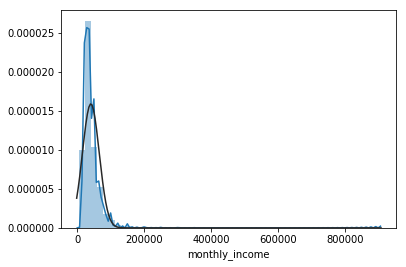

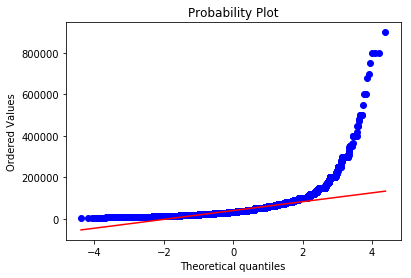

In [88]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income
sns.distplot(train['monthly_income'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['monthly_income'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

In [89]:
# вычисляем коэффициент асимметрии
train['monthly_income'].skew()

5.170662523993356

In [90]:
# вычисляем коэффициент эксцесса
train['monthly_income'].kurtosis()

81.08485953358395

In [ ]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной monthly_income,
# используем константу a, чтобы не брать
# логарифм нуля
a = 0.001
sns.distplot(np.log(train['monthly_income']+a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['monthly_income']+a), plot=plt)

In [ ]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа

sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs()**(1/2)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs()**(1/2)), plot=plt)

In [ ]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs()**(1/3)), fit=norm);

fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs()**(1/3)), plot=plt)

In [ ]:
# выполняем логарифмическое преобразование 
# указанных переменных
train['credit_sum'] = np.log(train['credit_sum']+a)
train['monthly_income'] = np.log(train['monthly_income']+a)
train['age'] = np.log(train['age']+a)

test['credit_sum'] = np.log(test['credit_sum']+a)
test['monthly_income'] = np.log(test['monthly_income']+a)
test['age'] = np.log(test['age']+a)

In [ ]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной monthcat
bins = [-np.inf, 7.95, 9.6, 11.25, 13.725, 14.55,
        17.85, 20.325, 23.625, 24.45, 26.925, np.inf]
# осуществляем биннинг переменной credit_month и записываем
# результаты в новую переменную monthcat
train['monthcat'] = pd.cut(train['credit_month'], bins)
test['monthcat'] = pd.cut(test['credit_month'], bins)

In [ ]:
# строим таблицу сопряженности monthcat * open_account_flg
biv = pd.crosstab(train['monthcat'], train['open_account_flg'])
biv

In [ ]:
# вычисляем WoE для каждой категории переменной monthcat, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
a= 0.0001
WoE = np.log((1.0*biv['0']/sum(biv['0'])+a) / (1.0*biv['1']/sum(biv['1'])+a))
WoE

In [ ]:
# вычисляем IV для каждой категории переменной monthcat, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем "a=0.0001", 
# чтобы избежать деления на 0
IV_cat=((1.0*biv['0']/sum(biv['0'])+a) - 
          (1.0*biv['1']/sum(biv['1'])+a))*np.log((1.0*biv['0']/sum(biv['0'])+a) 
                                                  / (1.0*biv['1']/sum(biv['1'])+a))
IV_cat

In [ ]:
# вычисляем итоговое IV для переменной monthcat
IV = sum(((1.0*biv['0']/sum(biv['0'])+a) - 
          (1.0*biv['1']/sum(biv['1'])+a))*np.log((1.0*biv['0']/sum(biv['0'])+a) 
                                                  / (1.0*biv['1']/sum(biv['1'])+a)))
IV

In [ ]:
# пишем функцию, вычисляющую IV
# по всем предикторам
def auto_IV(df): 
    iv_list = [] 
    a= 0.0001
    df_drop = df.drop("open_account_flg", axis=1) 
    for var_name in df_drop: 
        biv = pd.crosstab(df[var_name],df["open_account_flg"])        
        IV = sum(((1.0*biv['0']/sum(biv['0'])+a) - (1.0*biv['1']/sum(biv['1'])+a))*
                 np.log((1.0*biv['0']/sum(biv['0'])+a) / (1.0*biv['1']/sum(biv['1'])+a)))
        iv_list.append(IV)
    col_list =list(df_drop)
    results = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by = 'IV', ascending = False))  

In [ ]:
auto_IV(train)

In [ ]:
# выполняем дамми-кодирование
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'age':'monthcat_(26.925, inf]']
X_test = test_dummies.loc[:, 'age':'monthcat_(26.925, inf]']
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=500, max_depth=17, random_state=152, n_jobs=-1)
# подгоняем модель
forest.fit(X_train, y_train)
# cоздаем объект с названиями предикторов
feat_labels = X_train.columns
# cоздаем объект со значениями важностей, вычисленными 
# моделью forest (обратите внимание, речь идет о 
# важностях на основе усредненного уменьшения
# неоднородности)
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем 
# названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))


In [ ]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 8.343, 8.558, 8.880, 
        8.987, 9.309, 9.416, 9.631, 
        9.738, 9.953, 10.167, 10.275,
        10.489, 10.704, 11.133, 11.348, 11.562, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins)
test['credsumcat'] = pd.cut(test['credit_sum'], bins)

In [ ]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff']=train['tariff_id'].astype('int')
test['tariff']=test['tariff_id'].astype('int')

# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'][train['pti'] == np.inf] = 1
test['pti'][test['pti'] == np.inf] = 1

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

In [ ]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной paymcat
bins = [-np.inf, 0.42, 0.52, 0.70, 0.88,
        1.06, 1.16, 1.52, 1.70, 1.98, 2.25,
        2.34, 2.62, 2.89, np.inf]
# осуществляем биннинг переменной paym и записываем
# результаты в новую переменную paymcat
train['paymcat'] = pd.cut(train['paym'], bins)
test['paymcat'] = pd.cut(test['paym'], bins)

In [ ]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

In [ ]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

In [ ]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dummies.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'age':'paymcat_(2.89, inf]']
X_test = test_dummies.loc[:, 'age':'paymcat_(2.89, inf]']

In [ ]:
# применяем RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# строим логистическую регрессию на данных,
# отмасштабированных с помощью RobustScaler
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_scaled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])))

# Построение логистической регрессии в H2O

In [ ]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

In [ ]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

In [ ]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

In [ ]:
# преобразовываем категориальные переменные, неправильно прочитанные 
# как целочисленные (тип int), в категориальные (тип enum)

for i in ['tariff_id', 'open_account_flg']:
    if i in tr.columns:
        tr[i]=tr[i].asfactor()
        
for i in ['tariff_id', 'open_account_flg']:
    if i in valid.columns:
        valid[i]=valid[i].asfactor()

In [ ]:
# снова смотрим обучающий фрейм
tr.describe()

In [ ]:
# задаем название зависимой переменной
dependent = 'open_account_flg'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [ ]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative re-weighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [ ]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator, задав
# параметры (c помощью interactions задаем список предикторов для
# парных взаимодействий, alpha=1 задает l1-регуляризацию, 
# выполняющую отбор признаков в ходе перебора lambda, 
# заданного с помощью lambda_search, для проверки 
# зададим 10-блочную перекрестную проверку)
glm_model = H2OGeneralizedLinearEstimator(alpha=1, family= "binomial", seed=10000, 
                                          interactions=['gender', 'marital_status',
                                                        'education', 'living_region',
                                                        'tariff_id', 'paymcat'], lambda_search=True,
                                          nfolds=10, keep_cross_validation_predictions=True)
glm_model.train(predictors, dependent, training_frame= tr, validation_frame=valid)

In [ ]:
# смотрим модель
glm_model

In [ ]:
# смотрим оптимальное значение lambda
glm_model.summary()['regularization']